In [120]:
#Observations:
# 1. From the plot of Max Temp vs. City Latitude, it appears that the data confirms our hypothesis of "As we 
#    approaches the equator, temperature rises". In fact, the plot looks similar to a bell curve in that, overall,
#    the maximum temperature(s) are established near the middle of the plot (0 degrees latitude) and decrease as 
#    latitudes move further from the middle.
# 2. One set of plots that support the conclusion above are the linear regressions of Max Temp vs. City Latitude 
#    for the northern and southern hemispheres. In fact, these are the strongest correlation(s) present from the linear 
#    regression comparison plots. However, because both r2 values are less than .7, even these correlations are not  
#    direct evidence to confirm the hypothesis above.
# 3. From the linear regressions of Cloudiness vs. City Latitude for both northern and southern hemispheres,
#    it appears that there is almost no correlation to be made for these parameters. The overall plot of Cloudiness
#    vs. City Latitude confirms this conclusion, as nearly any percentage of cloudiness can be found with equal 
#    probability across the latitudinal range.

In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "File Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_longs = []
cities = []

# List for holding unique lat_lngs
unique_lat_longs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_longs = zip(lats, longs)

# Identify nearest city for each lat, long combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add city and lat_lng to above lists
    if city not in cities:
        cities.append(city)
        unique_lat_longs.append(lat_long)
    else:
        print(f"{city} is not unique")

# Print the city count to confirm sufficient count
len(cities)

puerto ayora is not unique
busselton is not unique
butaritari is not unique
castro is not unique
punta arenas is not unique
punta arenas is not unique
mataura is not unique
cape town is not unique
faanui is not unique
cape town is not unique
puerto ayora is not unique
atuona is not unique
port alfred is not unique
taolanaro is not unique
puerto ayora is not unique
albany is not unique
atuona is not unique
mahebourg is not unique
taolanaro is not unique
luderitz is not unique
cape town is not unique
punta arenas is not unique
pevek is not unique
avarua is not unique
avarua is not unique
mataura is not unique
albany is not unique
hilo is not unique
castro is not unique
port alfred is not unique
puerto ayora is not unique
atuona is not unique
faanui is not unique
ushuaia is not unique
victoria is not unique
belushya guba is not unique
punta arenas is not unique
georgetown is not unique
rikitea is not unique
ushuaia is not unique
busselton is not unique
luderitz is not unique
salalah is no

albany is not unique
puerto ayora is not unique
ushuaia is not unique
hobart is not unique
punta arenas is not unique
saint-joseph is not unique
tuktoyaktuk is not unique
vaini is not unique
east london is not unique
saint anthony is not unique
kodiak is not unique
puerto ayora is not unique
rikitea is not unique
ilulissat is not unique
illoqqortoormiut is not unique
illoqqortoormiut is not unique
tsihombe is not unique
new norfolk is not unique
ushuaia is not unique
kodiak is not unique
port lincoln is not unique
jamestown is not unique
hambantota is not unique
dikson is not unique
souillac is not unique
jamestown is not unique
kapaa is not unique
atar is not unique
belushya guba is not unique
ushuaia is not unique
itarema is not unique
rikitea is not unique
gat is not unique
luderitz is not unique
thompson is not unique
narsaq is not unique
kavaratti is not unique
esperance is not unique
avarua is not unique
ushuaia is not unique
cidreira is not unique
ushuaia is not unique
caravelas

cidreira is not unique
tasiilaq is not unique
lebu is not unique
lebu is not unique
ushuaia is not unique
tasiilaq is not unique
itarema is not unique
narsaq is not unique
port elizabeth is not unique
bredasdorp is not unique
muros is not unique
yellowknife is not unique
ushuaia is not unique
ushuaia is not unique
faanui is not unique
qaanaaq is not unique
puerto ayora is not unique
vostok is not unique
illoqqortoormiut is not unique
amderma is not unique
tiksi is not unique
lebu is not unique
wawa is not unique
faanui is not unique
illoqqortoormiut is not unique
nanortalik is not unique
new norfolk is not unique
puerto ayora is not unique
hobart is not unique
bethel is not unique
busselton is not unique
taolanaro is not unique
westport is not unique
kruisfontein is not unique
rawson is not unique
sentyabrskiy is not unique
asau is not unique
vaini is not unique
tsihombe is not unique
ushuaia is not unique
narsaq is not unique
geraldton is not unique
rikitea is not unique
mys shmidta i

592

In [3]:
#Place lats & lngs from each unique lat_lng into separate lists

unique_lats = []
unique_longs = []

for i in range(len(unique_lat_longs)):
    unique_lats.append(unique_lat_longs[i][0])
    unique_longs.append(unique_lat_longs[i][1])

In [4]:
#Initialize variables and lists
count = 0
max_temps = []
humidities = []
cloudiness = []
wind_speeds = []
dates = []
countries = []


#Open Output File (CSV)

with open(output_data_file,"w") as weather:
    
    weather.write("City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date\n")

    #Loop through cities and create custom target urls to get data from OpenWeather API if data exists
 
    for city in cities:
        count = count + 1
        try:
            base_url = "http://api.openweathermap.org/data/2.5/weather?"
            url = base_url + "appid=" + api_key + "&q=" + city
            response = requests.get(url).json()

            lat = response["coord"]["lat"]
            long = response["coord"]["lon"]
            max_temp = float(response["main"]["temp_max"])
            humidity = float(response["main"]["humidity"])
            clouds = float(response["clouds"]["all"])
            wind = float(response["wind"]["speed"])
            date = float(response["dt"])
            date = datetime.datetime.fromtimestamp(date).strftime('%m-%d-%Y')
            country = response["sys"]["country"]
            
            max_temp = 1.8*(max_temp-273.15)+32
            
            max_temps.append(max_temp)
            humidities.append(humidity)
            cloudiness.append(clouds)
            wind_speeds.append(wind)
            dates.append(date)
            countries.append(country)
            
            #Write data to Output File (CSV)
            weather.write(f"{city},{lat},{long},{max_temp},{humidity},{clouds},{wind},{country},{date}\n")

            print(f"Processing Record {count} of {len(cities)} | {city}")
        
        #If data does not exist for the city, write "NaN" to the Output File and dataframe
        except:
            max_temps.append(np.NaN)
            humidities.append(np.NaN)
            cloudiness.append(np.NaN)
            wind_speeds.append(np.NaN)
            dates.append(np.NaN)
            countries.append(np.NaN)

            weather.write(f"{city},{lat},{long},NaN,NaN,NaN,NaN,NaN,NaN\n")


            print(f"{city} not found. Skipping...")
        

Processing Record 1 of 592 | cidreira
Processing Record 2 of 592 | gedo
Processing Record 3 of 592 | esperance
Processing Record 4 of 592 | bredasdorp
Processing Record 5 of 592 | bahia blanca
Processing Record 6 of 592 | busselton
Processing Record 7 of 592 | tasiilaq
Processing Record 8 of 592 | avarua
Processing Record 9 of 592 | guane
Processing Record 10 of 592 | topolobampo
Processing Record 11 of 592 | mahebourg
Processing Record 12 of 592 | klaksvik
Processing Record 13 of 592 | atuona
Processing Record 14 of 592 | gat
amderma not found. Skipping...
Processing Record 16 of 592 | coquimbo
Processing Record 17 of 592 | puerto ayora
Processing Record 18 of 592 | hilo
Processing Record 19 of 592 | arraial do cabo
Processing Record 20 of 592 | kahului
Processing Record 21 of 592 | rawson
Processing Record 22 of 592 | thompson
Processing Record 23 of 592 | reshetnikovo
Processing Record 24 of 592 | chokurdakh
Processing Record 25 of 592 | hithadhoo
Processing Record 26 of 592 | georg

Processing Record 212 of 592 | kurilsk
Processing Record 213 of 592 | zhumadian
Processing Record 214 of 592 | bengkulu
Processing Record 215 of 592 | narsaq
Processing Record 216 of 592 | viedma
Processing Record 217 of 592 | paamiut
Processing Record 218 of 592 | saint-joseph
Processing Record 219 of 592 | snasa
Processing Record 220 of 592 | yumen
Processing Record 221 of 592 | beloha
Processing Record 222 of 592 | moose factory
Processing Record 223 of 592 | amarwara
Processing Record 224 of 592 | mount isa
Processing Record 225 of 592 | merrill
Processing Record 226 of 592 | husavik
Processing Record 227 of 592 | pathein
Processing Record 228 of 592 | jesup
Processing Record 229 of 592 | springdale
Processing Record 230 of 592 | bilma
Processing Record 231 of 592 | okha
dinsor not found. Skipping...
duz not found. Skipping...
Processing Record 234 of 592 | chapais
Processing Record 235 of 592 | saint george
barentsburg not found. Skipping...
Processing Record 237 of 592 | savannah

Processing Record 421 of 592 | ponta delgada
Processing Record 422 of 592 | nome
Processing Record 423 of 592 | belle fourche
jiddah not found. Skipping...
Processing Record 425 of 592 | kerrville
Processing Record 426 of 592 | havoysund
Processing Record 427 of 592 | el cobre
Processing Record 428 of 592 | tommot
Processing Record 429 of 592 | biak
Processing Record 430 of 592 | tateyama
Processing Record 431 of 592 | takoradi
Processing Record 432 of 592 | terrace
Processing Record 433 of 592 | nagua
Processing Record 434 of 592 | chkalovskoye
Processing Record 435 of 592 | beringovskiy
Processing Record 436 of 592 | carnaiba
Processing Record 437 of 592 | bulgan
Processing Record 438 of 592 | yeppoon
Processing Record 439 of 592 | ostrovnoy
Processing Record 440 of 592 | redmond
Processing Record 441 of 592 | pacific grove
Processing Record 442 of 592 | mawlaik
Processing Record 443 of 592 | gao
Processing Record 444 of 592 | burgeo
Processing Record 445 of 592 | ust-uda
Processing 

In [5]:
#Create weather DataFrame

weather_dict = {}

weather_dict = {"City": cities, "Lat": unique_lats, "Long": unique_longs, "Max Temp": max_temps,
               "Humidity": humidities, "Cloudiness":cloudiness, "Wind Speed": wind_speeds, 
                "Country": countries, "Date":dates}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cidreira,-40.239229,-38.583628,62.636,83.0,10.0,7.58,BR,08-26-2020
1,gedo,8.810476,37.002880,50.198,100.0,11.0,0.55,ET,08-26-2020
2,esperance,-36.001970,121.057058,46.400,100.0,0.0,4.60,AU,08-26-2020
3,bredasdorp,-56.432674,18.024154,57.200,71.0,14.0,4.10,ZA,08-26-2020
4,bahia blanca,-39.050948,-62.933667,52.520,86.0,100.0,4.08,AR,08-26-2020


In [6]:
#Clean weather DataFrame

weather_dropna_df = weather_df.dropna(how="any")
weather_dropna_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cidreira,-40.239229,-38.583628,62.636,83.0,10.0,7.58,BR,08-26-2020
1,gedo,8.810476,37.002880,50.198,100.0,11.0,0.55,ET,08-26-2020
2,esperance,-36.001970,121.057058,46.400,100.0,0.0,4.60,AU,08-26-2020
3,bredasdorp,-56.432674,18.024154,57.200,71.0,14.0,4.10,ZA,08-26-2020
4,bahia blanca,-39.050948,-62.933667,52.520,86.0,100.0,4.08,AR,08-26-2020


In [71]:
#Question: Do we need to make summary statistics dataframe?

In [7]:
#  Get the indices of cities that have humidity over 100%

hum_over_100 = weather_dropna_df.loc[weather_dropna_df["Humidity"]>100].index
hum_over_100

Int64Index([], dtype='int64')

In [8]:
#Drop rows with humidity over 100%

cleaned_weather_df = weather_dropna_df.drop(axis=0,index=hum_over_100,inplace=False)
cleaned_weather_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cidreira,-40.239229,-38.583628,62.636,83.0,10.0,7.58,BR,08-26-2020
1,gedo,8.810476,37.002880,50.198,100.0,11.0,0.55,ET,08-26-2020
2,esperance,-36.001970,121.057058,46.400,100.0,0.0,4.60,AU,08-26-2020
3,bredasdorp,-56.432674,18.024154,57.200,71.0,14.0,4.10,ZA,08-26-2020
4,bahia blanca,-39.050948,-62.933667,52.520,86.0,100.0,4.08,AR,08-26-2020


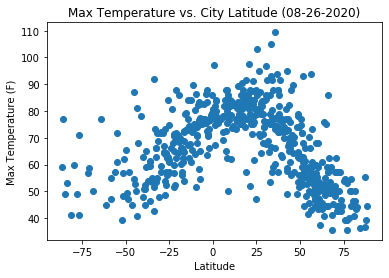

In [9]:
#Plot Max Temperature vs City Latitude (overall)

x_values = cleaned_weather_df["Lat"]
y_values = cleaned_weather_df["Max Temp"]
date = cleaned_weather_df.iloc[0,8]

temp_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"Max Temperature vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Images/temp_vs_lat.png")

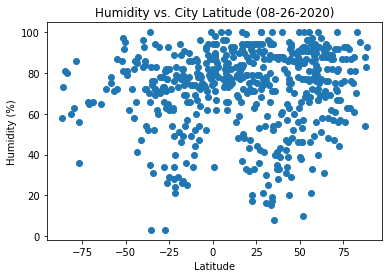

In [10]:
#Plot Humidity vs City Latitude (overall)

x_values = cleaned_weather_df["Lat"]
y_values = cleaned_weather_df["Humidity"]

hum_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"Humidity vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Images/hum_vs_lat.png")

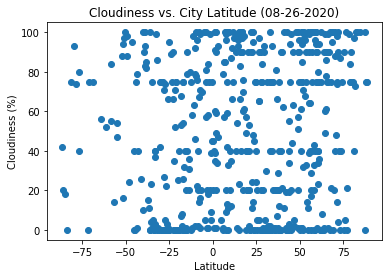

In [11]:
#Plot Cloudiness vs City Latitude (overall)

x_values = cleaned_weather_df["Lat"]
y_values = cleaned_weather_df["Cloudiness"]

cloud_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"Cloudiness vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Images/cloud_vs_lat.png")

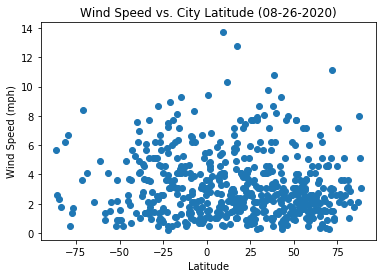

In [12]:
#Plot Wind Speed vs City Latitude (overall)

x_values = cleaned_weather_df["Lat"]
y_values = cleaned_weather_df["Wind Speed"]

wind_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"Wind Speed vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Images/wind_vs_lat.png")

In [13]:
#Filter and separate cleaned DataFrame into northern and southern hemispheres

northern_hemi_df = cleaned_weather_df.loc[cleaned_weather_df["Lat"]>0]
southern_hemi_df = cleaned_weather_df.loc[cleaned_weather_df["Lat"]<0]

r value: 0.5446546816845064
The plot shows a somewhat strong negative trend between rising latitude and max temperature;
i.e. as we travel further from the equator, max temperature falls.


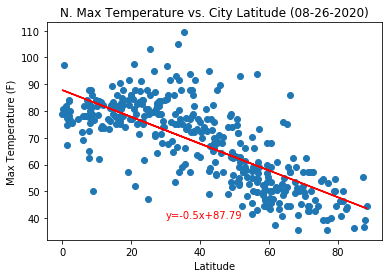

In [14]:
#Plot Max Temperature vs City Latitude (Northern Hemisphere)

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

temp_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"N. Max Temperature vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (30,40),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/n_temp_vs_lat.png")

print("The plot shows a somewhat strong negative trend between rising latitude and max temperature;")
print("i.e. as we travel further from the equator, max temperature falls.")

r value: 0.290347659993263
The plot shows a somewhat strong positive trend between rising latitude and max temperature;
i.e. as we travel closer to the equator, max temperature rises.


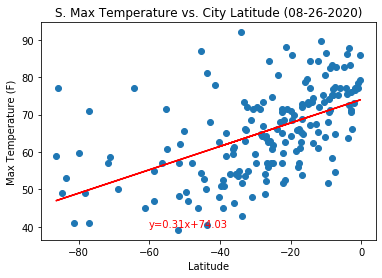

In [15]:
#Plot Max Temperature vs City Latitude (Southern Hemisphere)

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

temp_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"S. Max Temperature vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (-60,40),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/s_temp_vs_lat.png")
print("The plot shows a somewhat strong positive trend between rising latitude and max temperature;")
print("i.e. as we travel closer to the equator, max temperature rises.")

r value: 5.87044472139181e-05
There appears to be no significant correlation between humidity and latitude.


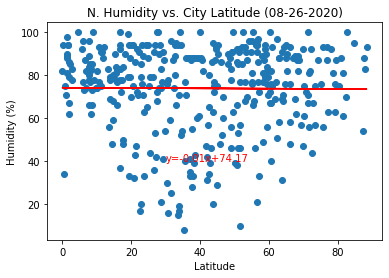

In [16]:
#Plot Humidity vs City Latitude (Northern Hemisphere)

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

hum_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"N. Humidity vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (30,40),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/n_hum_vs_lat.png")
print("There appears to be no significant correlation between humidity and latitude.")

r value: 0.00010334631774692871
There appears to be no significant correlation between humidity and latitude.


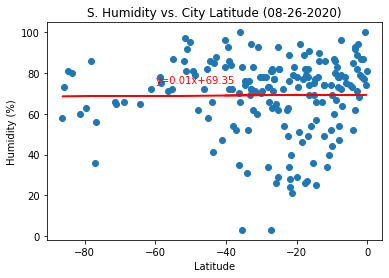

In [17]:
#Plot Humidity vs City Latitude (Southern Hemisphere)

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

hum_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"S. Humidity vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (-60,75),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/s_hum_vs_lat.png")
print("There appears to be no significant correlation between humidity and latitude.")

r value: 0.00616367000332205
There appears to be no significant correlation between cloudiness and latitude.


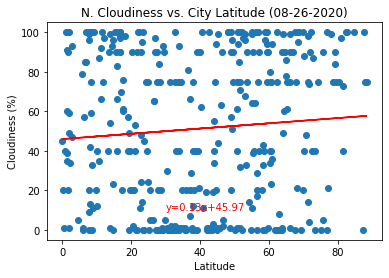

In [18]:
#Plot Cloudiness vs City Latitude (Northern Hemisphere)

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

cloud_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"N. Cloudiness vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (30,10),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/n_cloud_vs_lat.png")
print("There appears to be no significant correlation between cloudiness and latitude.")

r value: 0.0048006340625469214
There appears to be no significant correlation between cloudiness and latitude.


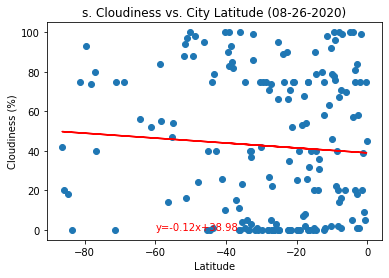

In [19]:
#Plot Cloudiness vs City Latitude (Southern Hemisphere)

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

cloud_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"s. Cloudiness vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (-60,0),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/s_cloud_vs_lat.png")
print("There appears to be no significant correlation between cloudiness and latitude.")

r value: 0.0116890921448532
There appears to be no significant correlation between wind speed and latitude.


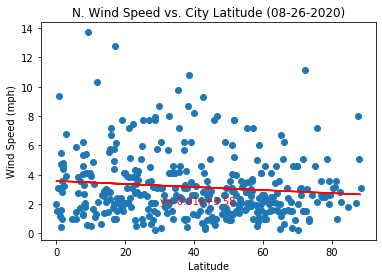

In [20]:
#Plot Wind Speed vs City Latitude (Northern Hemisphere)

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

wind_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"N. Wind Speed vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (30,2),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/n_wind_vs_lat.png")
print("There appears to be no significant correlation between wind speed and latitude.")

r value: 0.00015328266499657243
There appears to be no significant correlation between wind speed and latitude.


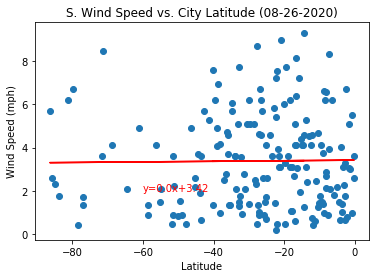

In [21]:
#Plot Wind Speed vs City Latitude (Southern Hemisphere)

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

wind_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"S. Wind Speed vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (-60,2),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/s_wind_vs_lat.png")
print("There appears to be no significant correlation between wind speed and latitude.")